### Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [76]:
sns.set_style("darkgrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db, table_name))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [77]:
life_expectancy.head(17)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [78]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

lets fill the missing value with interpolate as it is a timeseries data;

In [79]:
for country in life_expectancy['Country']:
    life_expectancy[life_expectancy['Country'] == country] = life_expectancy[life_expectancy['Country'] == country].interpolate()
    
life_expectancy.dropna(inplace = True)    

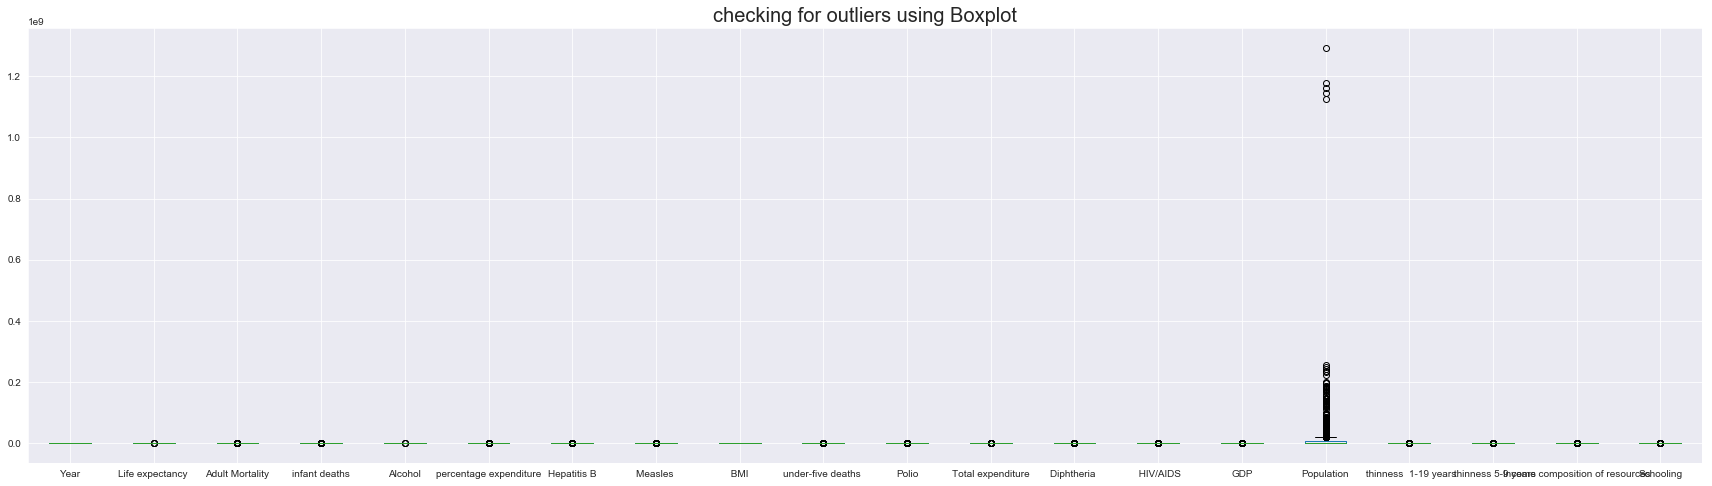

In [80]:
plt.figure(figsize = (30, 8))
life_expectancy.boxplot()
plt.title('checking for outliers using Boxplot', fontsize = 20);

from the box plot in the above we can understand that the only variable(column) with outliers is the population and this is due too some countries like china,india and some others has way bigger population size than the majority others.In this case i dont see any reason to consider it as outliers as they have little to do with compromizing my analysis.

our outcome variable is 'Life expectancy' so lets see the distribution of that variable across the status of the countries;

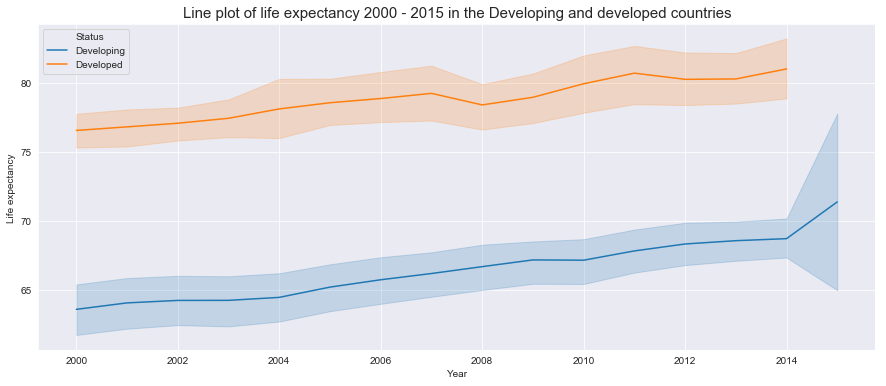

In [81]:
plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Year', y = 'Life expectancy ', hue = 'Status', data = life_expectancy);
plt.title('Line plot of life expectancy 2000 - 2015 in the Developing and developed countries', fontsize = 15);

The above plot shows us that life expectancy was increasing over the year for both developing and developed countries.So what coused this change is very important as the variables which influenced the above result will be those same variables which we need to deevelop our prediction model for the coming years.Understanding the most influencing variables is very vital to governments and policy makers in particular and general human population in general to work towards a better goal of improving human living condition to increase the life expectancy in the future.

so now lets see which variables are the most positive influencers or negative influencers when it comes to extending the life expectancy.

In [82]:
life_expectancy.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.171485,-0.072108,-0.037601,-0.046859,0.089096,0.247259,-0.099554,0.096059,-0.042479,0.117642,0.074139,0.166006,-0.142581,0.119355,0.022775,-0.047477,-0.053483,0.242900,0.225046
Life expectancy,0.171485,1.000000,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,0.415188,0.199288,0.442943,-0.576373,0.443612,-0.010840,-0.458724,-0.450095,0.726753,0.744703
Adult Mortality,-0.072108,-0.660529,1.000000,0.038304,-0.181469,-0.242438,-0.103382,-0.007269,-0.372519,0.052865,-0.208006,-0.096727,-0.210136,0.536273,-0.256955,-0.022403,0.278842,0.284581,-0.411010,-0.404160
infant deaths,-0.037601,-0.160922,0.038304,1.000000,-0.104406,-0.089772,-0.216949,0.509747,-0.227769,0.996729,-0.152153,-0.147961,-0.156470,0.001739,-0.097720,0.562805,0.481580,0.487596,-0.137175,-0.195815
Alcohol,-0.046859,0.392617,-0.181469,-0.104406,1.000000,0.430835,0.106383,-0.029252,0.379327,-0.099713,0.239854,0.227108,0.245454,-0.033756,0.458112,-0.025556,-0.398731,-0.387087,0.532173,0.590261
percentage expenditure,0.089096,0.413683,-0.242438,-0.089772,0.430835,1.000000,-0.011530,-0.069316,0.277788,-0.092480,0.162606,0.217103,0.168910,-0.109680,0.963177,-0.016607,-0.268347,-0.268131,0.408174,0.426801
Hepatitis B,0.247259,0.249625,-0.103382,-0.216949,0.106383,-0.011530,1.000000,-0.142059,0.198627,-0.226512,0.451299,0.130435,0.552732,-0.104034,0.009077,-0.092418,-0.166903,-0.181161,0.239386,0.268951
Measles,-0.099554,-0.138133,-0.007269,0.509747,-0.029252,-0.069316,-0.142059,1.000000,-0.168172,0.519173,-0.113574,-0.111638,-0.119828,0.019600,-0.073858,0.269840,0.227961,0.223325,-0.137648,-0.146625
BMI,0.096059,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1.000000,-0.238155,0.264753,0.233643,0.266601,-0.239171,0.300517,-0.071306,-0.560982,-0.567943,0.539862,0.584998
under-five deaths,-0.042479,-0.187438,0.052865,0.996729,-0.099713,-0.092480,-0.226512,0.519173,-0.238155,1.000000,-0.169989,-0.148325,-0.177302,0.013390,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678


from the correlation matrix in the above we can learn that there is a negative correlation between life expectancy and 8 of the variables.But the rest variable have a positive relationship to the outcome variable.

When comparing the intervariables relationship we can see that there is a very high correlation between the infant moratlity and underfive mortality and this is caused because the former is a subset of the later.Other variables correlated though their correlation is weak to moderate which is a convinient situation for applying PCA.

Lets normalize the data because PCA assumes normal distribution and then generate the covariance matrix.But lets first transform the categorical data in to digits for the model fitting purpose.

In [90]:
X = StandardScaler().fit_transform(life_expectancy.iloc[:, 3:23])
# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00050352 -0.66086129 -0.16100269  0.39281437  0.4138912   0.24975075
  -0.13820273  0.5998739  -0.18753235  0.41539755  0.19938793  0.44316585
  -0.57666339  0.44383561 -0.01084498 -0.45895542 -0.4503212   0.72711846
   0.74507813  0.06664631]
 [-0.66086129  1.00050352  0.03832331 -0.18156065 -0.24255965 -0.10343401
  -0.00727259 -0.37270686  0.05289129 -0.20811097 -0.09677546 -0.21024183
   0.53654283 -0.257084   -0.02241463  0.27898202  0.28472473 -0.41121663
  -0.40436367 -0.0891441 ]
 [-0.16100269  0.03832331  1.00050352 -0.10445823 -0.0898171  -0.21705836
   0.5100033  -0.22788367  0.99723126 -0.15222916 -0.14803564 -0.15654912
   0.00173976 -0.09776957  0.56308826  0.48182266  0.48784171 -0.13724453
  -0.19591385 -0.02334709]
 [ 0.39281437 -0.18156065 -0.10445823  1.00050352  0.43105217  0.10643695
  -0.02926644  0.37951771 -0.09976308  0.23997506  0.22722269  0.24557766
  -0.03377268  0.45834272 -0.02556837 -0.39893183 -0.38728196  0.53244098
   0.590558

Next step is selecting the number of components on the basis of PCA principles.To accomplish that lets find the Eigenvalues and select those greater than 1 to be included in the list of new components.

In [91]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [92]:
for i in range(len(eig_val_cov)):
    if eig_val_cov[i] > 1:
        print('no.{} component included'.format(i + 1))

no.1 component included
no.2 component included
no.3 component included
no.4 component included
no.5 component included


Therefore the dimension is reduced from 22 variables to 5 components.Now lets move on and fit the PCA to find The percentage of total variance in the dataset explained by each component from Sklearn PCA.

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.31705747 0.14040232 0.09185975 0.07655298 0.05714432] which is a total of 0.683016827970359 
 Therefore 68.3016827970359% of the total variance was explained by the five components


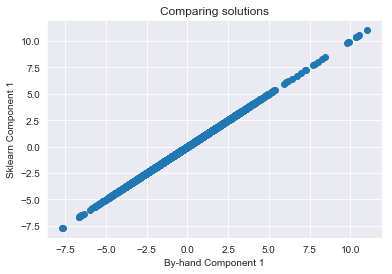

In [96]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
    , 'which is a total of {}'.format(np.array(sklearn_pca.explained_variance_ratio_).sum())
    , '\n Therefore {}% of the total variance was explained by the five components'.format(np.array(sklearn_pca.explained_variance_ratio_).sum() * 100)
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()